<a href="https://colab.research.google.com/github/Kartik1-ok/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loan Approval Prediction

In [44]:
### Installing Libraries
pip install gdown

In [45]:
### Loading the Dataset
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()


if len(uploaded) == 1:
    file_name = next(iter(uploaded))
    print(f'User uploaded file "{file_name}"')


    try:
        df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))


        print("\n✅ Dataset Loaded Successfully!\n")
        display(df.head())
        print(df.info())
        display(df.describe())

    except Exception as e:
        print(f"Error loading the file: {e}")
else:
    print("Please upload a single file.")

Saving loan_approval_dataset.csv to loan_approval_dataset (2).csv
User uploaded file "loan_approval_dataset (2).csv"

✅ Dataset Loaded Successfully!



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [46]:
### Categorising the Data
df.columns
df.isnull().sum()
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [47]:
df.dropna(inplace=True)

In [48]:
df = pd.get_dummies(df, drop_first=True)

In [49]:
### Scaling Numerical Columns
from sklearn.preprocessing import StandardScaler


df.columns = df.columns.str.strip()

scaler = StandardScaler()

numeric_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                'residential_assets_value', 'commercial_assets_value',
                'luxury_assets_value', 'bank_asset_value']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Numerical columns scaled successfully.")

Numerical columns scaled successfully.


In [50]:
### Splitting the Data
X = df.drop('loan_status_ Rejected', axis=1)
y = df['loan_status_ Rejected']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
### Maching Learning model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9074941451990632
              precision    recall  f1-score   support

       False       0.92      0.93      0.93       536
        True       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


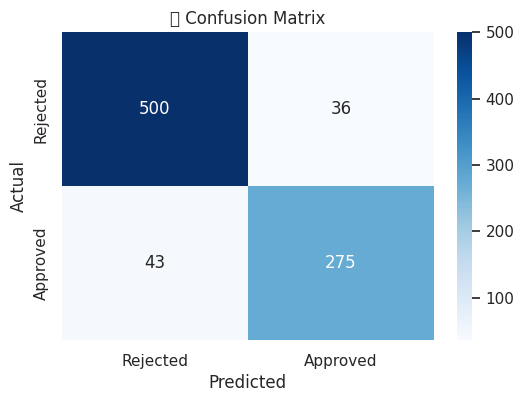

📄 Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.93      0.93       536
        True       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


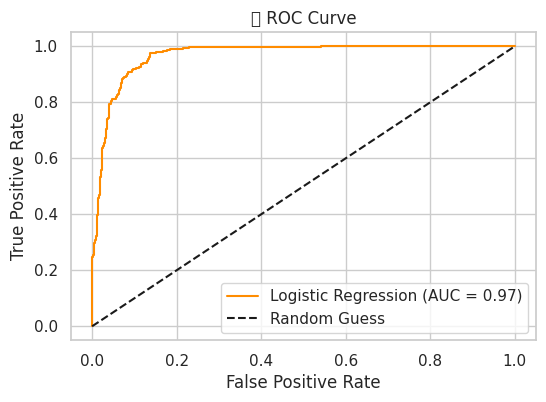

In [53]:
### Model Evaluation and Interpretation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print("📄 Classification Report:\n", classification_report(y_test, y_pred))


y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


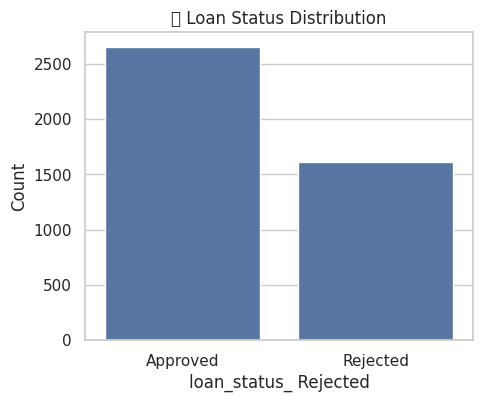

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


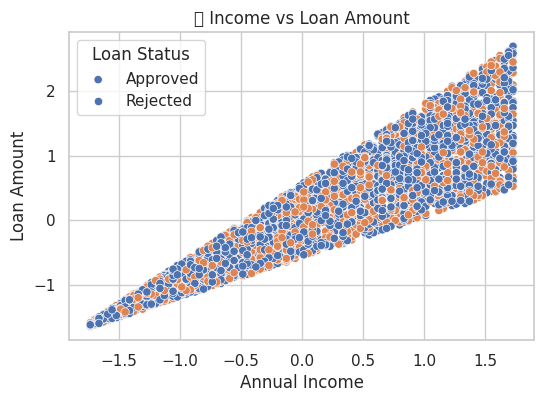

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


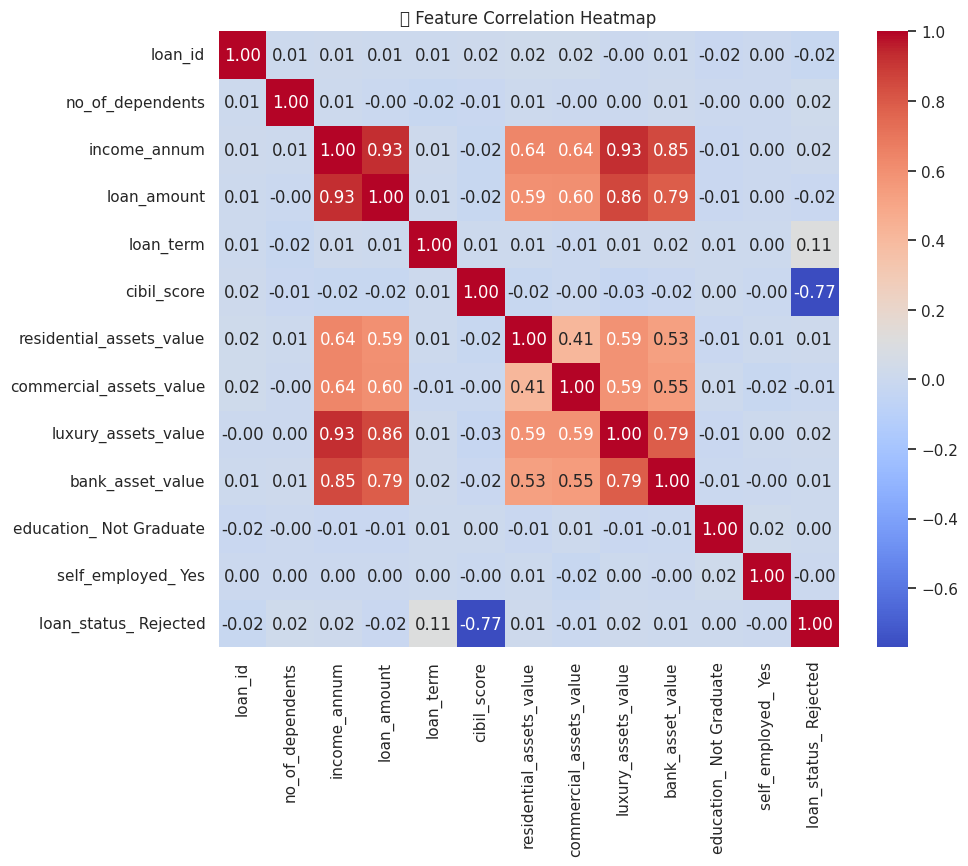

In [54]:
### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#plot style
sns.set(style="whitegrid")

# 1. Loan Status Distribution
plt.figure(figsize=(5, 4))

sns.countplot(x='loan_status_ Rejected', data=df)
plt.title("✅ Loan Status Distribution")

plt.xticks([0, 1], ['Approved', 'Rejected'])
plt.ylabel("Count")
plt.show()

# 2. Income vs. Loan Amount colored by Loan Status

if 'income_annum' in df.columns and 'loan_amount' in df.columns:
    plt.figure(figsize=(6, 4))

    sns.scatterplot(x='income_annum', y='loan_amount', hue='loan_status_ Rejected', data=df)
    plt.title("💰 Income vs Loan Amount")
    plt.xlabel("Annual Income")
    plt.ylabel("Loan Amount")

    plt.legend(title="Loan Status", labels=["Approved", "Rejected"])
    plt.show()
else:
    print("Income or Loan Amount columns not found for the scatter plot.")


# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))


numeric_df = df.select_dtypes(include=['number', 'bool'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("🔗 Feature Correlation Heatmap")
plt.show()